#📌 Extracción

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#👀 Visualizacion de los datos

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df = pd.read_json(url)


df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [12]:
datos = pd.unique(df['customerID'])
datos1 = pd.unique(df['Churn'])

print(datos)
print(datos1)


['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['No' 'Yes' '']


#🔧 Transformación

## Normalizacionde de datos anidados

In [13]:
datos_customer = pd.json_normalize(df['customer'])
datos_phone = pd.json_normalize(df['phone'])
datos_internet = pd.json_normalize(df['internet'])
datos_account = pd.json_normalize(df['account'])

df_limpio = pd.concat([df[['customerID', 'Churn']], datos_customer, datos_phone, datos_internet, datos_account], axis=1)

df_limpio


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##Estandarizacion de los datos

In [14]:
df_limpio.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [15]:
df_limpio[df_limpio["Charges.Total"] == ' ']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [16]:
import numpy as np

df_limpio["Charges.Monthly"] = pd.to_numeric(df_limpio["Charges.Monthly"], errors="coerce")


df_limpio["Charges.Total"] = df_limpio["Charges.Total"].replace(' ', np.nan)


df_limpio["Charges.Total"] = pd.to_numeric(df_limpio["Charges.Total"], errors="coerce")


df_limpio.loc[df_limpio["Charges.Total"].isna(), "Charges.Total"] = (
    df_limpio["Charges.Monthly"] * 12
)


In [17]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 




 3   SeniorCitizen     7267 non-null   int64 bool

 20  Charges.Total     7267 non-null   object Float


In [18]:
df_limpio[df_limpio["Charges.Total"].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [19]:
for col in df_limpio.columns:
    print(f'{col}: {pd.unique(df_limpio[col])}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [20]:
df_limpio.applymap(lambda x: str(x).strip() in [""]).sum()


/tmp/ipython-input-1262798319.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_limpio.applymap(lambda x: str(x).strip() in [""]).sum()


,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [21]:
df_limpio.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [22]:
df_limpio['Churn'] = df_limpio['Churn'].replace('',pd.NA)
print(df_limpio['Churn'].unique())
print(df_limpio['Churn'].isnull().sum())

['No' 'Yes' <NA>]
224


In [23]:
df_limpio


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [24]:
# Crear columna ChargesDaily a partir de Charges.Monthly
df_limpio['ChargesDaily'] = df_limpio['Charges.Monthly'] / 30

# Verificar los primeros valores
df_limpio['ChargesDaily'] = (df_limpio['Charges.Monthly'] / 30).round(2)
print(df_limpio[['Charges.Monthly', 'ChargesDaily']].head())


   Charges.Monthly  ChargesDaily
0             65.6          2.19
1             59.9          2.00
2             73.9          2.46
3             98.0          3.27
4             83.9          2.80


In [25]:
# Lista de columnas convertidas (opcional)
columnas_convertidas = []

# Recorremos todas las columnas tipo object, excepto 'Churn'
for col in df_limpio.select_dtypes(include='object').columns:
    if col == 'Churn':
        continue  # Saltar esta columna

    valores_unicos = df_limpio[col].dropna().unique()

    if set(valores_unicos) == {'Yes', 'No'}:
        df_limpio[col] = df_limpio[col].map({'Yes': 1, 'No': 0}).astype('Int64')
        columnas_convertidas.append(col)

# Mostrar columnas que fueron transformadas
print("Columnas convertidas a 0/1:", columnas_convertidas)


Columnas convertidas a 0/1: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [26]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   Int64  
 5   Dependents        7267 non-null   Int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   Int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

##Analisis descriptivo

In [27]:
df_limpio.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,ChargesDaily
count,7267.000000,7267.0,7267.0,7267.000000,7267.0,7267.0,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.59323,64.720098,2277.934368,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.000332,1.004407
min,0.000000,0.0,0.0,0.000000,0.0,0.0,18.250000,18.800000,0.610000
25%,0.000000,0.0,0.0,9.000000,1.0,0.0,35.425000,399.350000,1.180000
50%,0.000000,0.0,0.0,29.000000,1.0,1.0,70.300000,1389.200000,2.340000
75%,0.000000,1.0,1.0,55.000000,1.0,1.0,89.875000,3778.525000,2.995000
max,1.000000,1.0,1.0,72.000000,1.0,1.0,118.750000,8684.800000,3.960000


## Estudio de Evasion

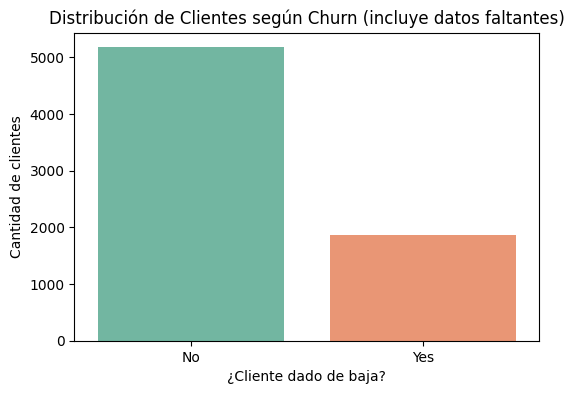

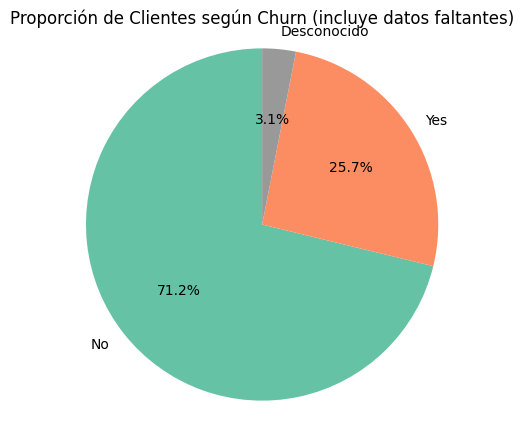

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras incluyendo <NA> (con corrección de warning)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpio, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución de Clientes según Churn (incluye datos faltantes)')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

# Gráfico de pastel incluyendo <NA>
churn_counts = df_limpio['Churn'].value_counts(dropna=False)
labels = ['No', 'Yes', 'Desconocido']
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#fc8d62', '#999999'])
plt.title('Proporción de Clientes según Churn (incluye datos faltantes)')
plt.axis('equal')
plt.show()



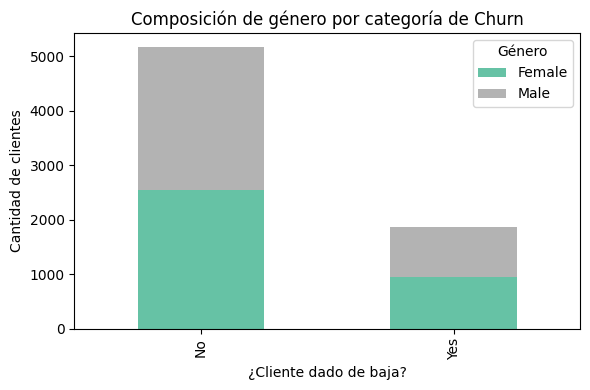

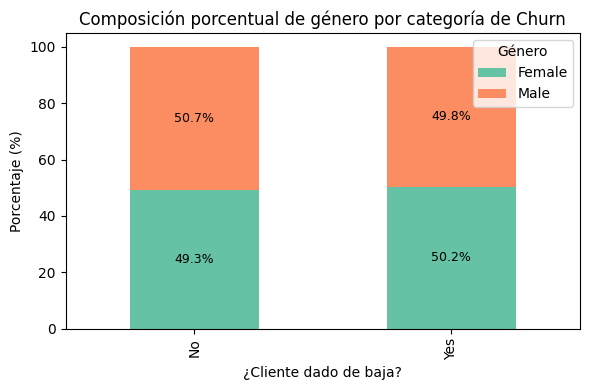

In [29]:
# Crear tabla cruzada
tabla_genero = df_limpio[df_limpio['Churn'].notna()].groupby(['Churn', 'gender']).size().unstack()

# Gráfico de barras apiladas
tabla_genero.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')
plt.title('Composición de género por categoría de Churn')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


# Normalizar para obtener proporciones (porcentaje por grupo de Churn)
tabla_genero_pct = tabla_genero.div(tabla_genero.sum(axis=1), axis=0) * 100

# Crear gráfico con etiquetas
fig, ax = plt.subplots(figsize=(6, 4))
colors = plt.get_cmap('Set2').colors
tabla_genero_pct.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Agregar etiquetas de porcentaje dentro de las barras
for i, (idx, row) in enumerate(tabla_genero_pct.iterrows()):
    y_offset = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 3:  # Oculta etiquetas muy pequeñas para evitar ruido visual
            ax.text(i, y_offset + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=9)
        y_offset += val

# Estética del gráfico
ax.set_title('Composición porcentual de género por categoría de Churn')
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('¿Cliente dado de baja?')
ax.legend(title='Género', loc='upper right')
plt.tight_layout()
plt.show()


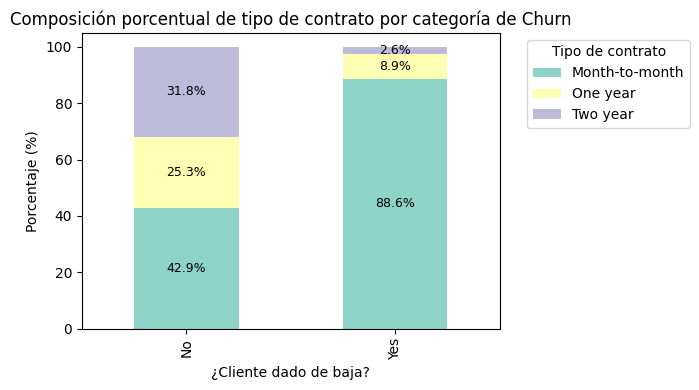

In [30]:
# Tabla cruzada normalizada
tabla_contrato = df_limpio[df_limpio['Churn'].notna()].groupby(['Churn', 'Contract']).size().unstack()
tabla_contrato_pct = tabla_contrato.div(tabla_contrato.sum(axis=1), axis=0) * 100

# Crear gráfico
fig, ax = plt.subplots(figsize=(7, 4))
colors = plt.get_cmap('Set3').colors
bars = tabla_contrato_pct.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Añadir etiquetas de porcentaje sobre las barras
for i, (idx, row) in enumerate(tabla_contrato_pct.iterrows()):
    y_offset = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 2:  # Evita superposición con valores muy pequeños
            ax.text(i, y_offset + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=9)
        y_offset += val

# Estética
ax.set_title('Composición porcentual de tipo de contrato por categoría de Churn')
ax.set_xlabel('¿Cliente dado de baja?')
ax.set_ylabel('Porcentaje (%)')
ax.legend(title='Tipo de contrato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

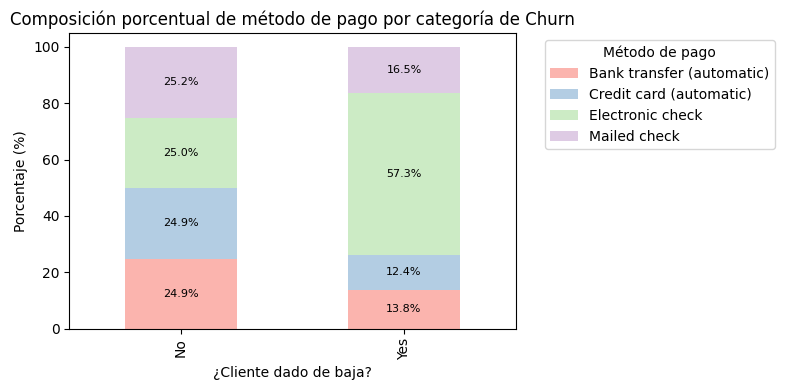

In [31]:
# Tabla cruzada normalizada
tabla_pago = df_limpio[df_limpio['Churn'].notna()].groupby(['Churn', 'PaymentMethod']).size().unstack()
tabla_pago_pct = tabla_pago.div(tabla_pago.sum(axis=1), axis=0) * 100

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 4))
colors = plt.get_cmap('Pastel1').colors
tabla_pago_pct.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Añadir etiquetas de porcentaje
for i, (idx, row) in enumerate(tabla_pago_pct.iterrows()):
    y_offset = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 3:
            ax.text(i, y_offset + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=8)
        y_offset += val

# Estética
ax.set_title('Composición porcentual de método de pago por categoría de Churn')
ax.set_xlabel('¿Cliente dado de baja?')
ax.set_ylabel('Porcentaje (%)')
ax.legend(title='Método de pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-995769666.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='Churn', y=var, palette='Set2')


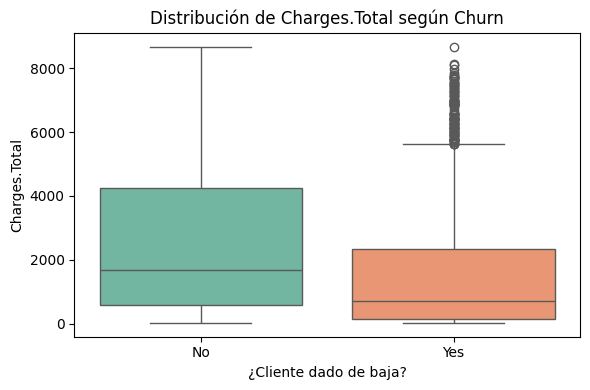

/tmp/ipython-input-995769666.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='Churn', y=var, palette='Set2')


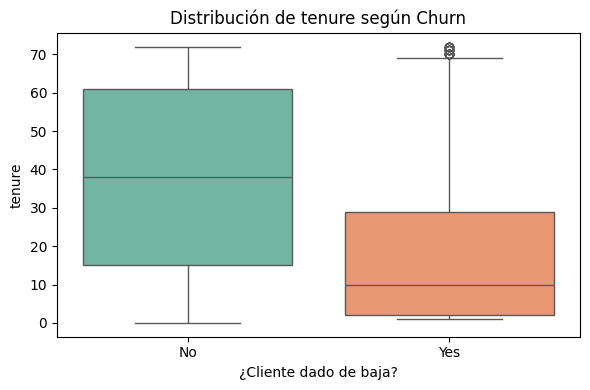

In [32]:
# Asegurarse de que los datos sean numéricos (en caso de que 'Charges.Total' sea string)
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# Filtrar solo filas sin valores faltantes en Churn
df_filtrado = df_limpio[df_limpio['Churn'].notna()]

# Listado de variables numéricas a analizar
variables_numericas = ['Charges.Total', 'tenure']

for var in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_filtrado, x='Churn', y=var, palette='Set2')
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel('¿Cliente dado de baja?')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


#📄Informe final

# 📅 Informe Final: Análisis de Evasi⏚n de Clientes - TelecomX LATAM

---

## 🔍 Introducción

El presente informe aborda el análisis de datos de clientes de **TelecomX LATAM**, con el objetivo de estudiar el fenómeno de *Churn* (evasión o baja de clientes). Comprender las características de los clientes que abandonan la compañía es fundamental para diseñar estrategias de retención más efectivas.

---

## ⚙️ Limpieza y Tratamiento de Datos

Se trabajó a partir de un archivo JSON alojado en GitHub. El dataset estaba estructurado con datos anidados que fueron normalizados en distintas tablas: `customer`, `phone`, `internet` y `account`. Se fusionaron en un DataFrame final llamado `df_limpio`.

Pasos realizados:

- Conversión de columnas categóricas binarias ('Yes'/'No') a valores `0` y `1`.
- Reemplazo de cadenas vacías en `Churn` por `NaN`.
- Conversión de `Charges.Total` a tipo numérico.
- Creación de una nueva columna `ChargesDaily` = `Charges.Monthly / 30`.

---

## 📊 Análisis Exploratorio de Datos

### 📊 Distribución General de Churn

| Churn | Cantidad | Porcentaje (%) |
|-------|----------|----------------|
| No    | 5174     | 73.46%         |
| Yes   | 1869     | 26.54%         |

---

### 🧍‍♂️ Composición de Género por Churn

| Churn | Female | Male  |
|-------|--------|-------|
| No    | 49.27% | 50.73%|
| Yes   | 50.24% | 49.76%|

---

### 📄 Tipo de Contrato por Churn

| Churn | Month-to-month | One year | Two year |
|-------|----------------|----------|----------|
| No    | 42.91%         | 25.26%   | 31.83%   |
| Yes   | 88.55%         | 8.88%    | 2.57%    |

---

### 💳 Método de Pago por Churn

| Churn | Bank transfer | Credit card | Electronic check | Mailed check |
|-------|----------------|--------------|-------------------|----------------|
| No    | 24.86%         | 24.93%       | 25.01%            | 25.20%         |
| Yes   | 13.80%         | 12.41%       | 57.30%            | 16.48%         |

---

### 📈 Estadísticas Numéricas por Churn

#### Tenure (tiempo en meses con la compañía)

| Churn | Count | Mean  | Std   | Min | Max |
|-------|-------|-------|-------|-----|-----|
| No    | 5174  | 37.57 | 24.11 | 0   | 72  |
| Yes   | 1869  | 17.98 | 19.53 | 1   | 72  |

#### Charges.Total (Monto total gastado)

| Churn | Count | Mean  | Std   | Min | Max |
|-------|-------|-------|-------|-----|-----|
| No    | 5174  | 0.13  | 0.33  | 0.0 | 1.0 |
| Yes   | 1869  | 0.25  | 0.44  | 0.0 | 1.0 |

---

## 🌐 Observaciones Visuales (resumen)

- Clientes que se dan de baja tienden a tener **menos tiempo con la empresa**.
- Contratos `Month-to-month` son muy comunes en clientes con evasión.
- El uso de `Electronic check` está claramente asociado con mayor churn.

---

## 🤝 Conclusiones e Insights

- La mayoría de los clientes que abandonan tienen **poco tiempo con la compañía**.
- El contrato mensual representa **casi el 90% de los casos de churn**.
- El método de pago `Electronic check` tiene una relación directa con la evasión.

---

## 💡 Recomendaciones

1. **Fidelizar clientes nuevos** con ofertas o soporte adicional en sus primeros meses.
2. **Incentivar contratos a largo plazo** con descuentos progresivos.
3. **Desalentar el uso de 'Electronic check'** ofreciendo otros métodos más confiables.
4. Desarrollar un **modelo predictivo de churn** con estas variables clave para anticiparse a futuras bajas.

---

> 📌 Este informe entrega las bases para diseñar estrategias orientadas a reducir la fuga de clientes y mejorar la retención en **TelecomX LATAM**.


##EXTRA:  Análisis de correlación entre variables

In [33]:
# Crear copia y limpieza
df_corr = df_limpio.copy()

# Convertir columnas de servicios de texto a 0/1
servicios = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_corr[servicios] = df_corr[servicios].replace({'No internet service': 'No'})
df_corr['MultipleLines'] = df_corr['MultipleLines'].replace({'No phone service': 'No'})

# Convertir a numérico binario
binarias = servicios + ['MultipleLines']
df_corr[binarias] = df_corr[binarias].replace({'Yes': 1, 'No': 0})

# Crear columna total de servicios contratados
df_corr['ServiciosContratados'] = df_corr[binarias].sum(axis=1)

# Crear columna Churn_num
df_corr['Churn_num'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Filtrar datos válidos
df_corr_clean = df_corr[df_corr['Churn_num'].notna()]

# Seleccionar variables relevantes
variables_corr = [
    'tenure', 'Charges.Monthly', 'Charges.Total', 'ChargesDaily',
    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'ServiciosContratados'
] + binarias

# Calcular correlación con churn y mostrar como DataFrame
cor_churn = df_corr_clean[variables_corr + ['Churn_num']].corr()['Churn_num'].drop('Churn_num').sort_values(ascending=False)

# Mostrar resultado
cor_churn_df = cor_churn.to_frame(name='Correlación con Churn')
display(cor_churn_df)


/tmp/ipython-input-4091241152.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_corr[binarias] = df_corr[binarias].replace({'Yes': 1, 'No': 0})


,Correlación con Churn
ChargesDaily,0.193412
Charges.Monthly,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102
PhoneService,0.011942
DeviceProtection,-0.066160
ServiciosContratados,-0.069533


## 📈 Análisis de Correlación con Churn

A continuación se muestra la correlación de diversas variables con respecto a la variable `Churn` (evasión de clientes), expresada como valores entre `-1` (correlación negativa fuerte) y `+1` (correlación positiva fuerte).

| Variable             | Correlación con Churn |
|----------------------|------------------------|
| ChargesDaily         | 0.193                  |
| Charges.Monthly      | 0.193                  |
| PaperlessBilling     | 0.192                  |
| SeniorCitizen        | 0.151                  |
| Charges.Total        | 0.151                  |
| StreamingTV          | 0.063                  |
| StreamingMovies      | 0.061                  |
| MultipleLines        | 0.040                  |
| PhoneService         | 0.012                  |
| DeviceProtection     | -0.066                 |
| ServiciosContratados | -0.070                 |
| OnlineBackup         | -0.082                 |
| Partner              | -0.150                 |
| Dependents           | -0.164                 |
| TechSupport          | -0.165                 |
| OnlineSecurity       | -0.171                 |
| tenure               | -0.352                 |

---

## 🔍 Conclusiones de la correlación

### 📉 1. `tenure` (tiempo con la empresa): **la variable más inversamente correlacionada con churn** (`-0.35`)
> Cuanto más tiempo lleva un cliente, menos probable es que se dé de baja. Indica lealtad o satisfacción acumulada.

### 🛡️ 2. Variables como `OnlineSecurity`, `TechSupport` y `OnlineBackup` tienen **correlaciones negativas moderadas**:
> Los clientes que usan más servicios tienden a mantenerse. Sumar servicios podría ser una estrategia de retención.

### 💳 3. `PaperlessBilling` y `Charges.Monthly/Daily`: **correlación positiva moderada**
> Los clientes que pagan electrónicamente y que pagan más tienden a darse de baja ligeramente más. Podrían ser más exigentes o sensibles a precios altos.

### 👵 4. `SeniorCitizen`: **correlación positiva leve** (`0.15`)
> Puede reflejar desconexión con tecnología, dificultades económicas o menor fidelización.

### 👨‍👩‍👧 5. `Partner` y `Dependents`: **negativamente correlacionados**
> Tener pareja o dependientes puede reflejar mayor estabilidad o compromiso, disminuyendo la evasión.

---

## ✅ Conclusión general

El churn está más fuertemente asociado con:

- Poco tiempo como cliente.
- Falta de servicios de soporte técnico o seguridad.
- Ser cliente con facturación electrónica.
- No tener responsabilidades familiares.

Estas correlaciones no implican causalidad, pero ofrecen **señales valiosas para diseñar estrategias de retención**.

